In [1]:
import pandas as pd
%matplotlib inline

In [2]:
metrics_frame = pd.read_excel('Readiness Score.xlsx', sheet_name='Data')
metrics_frame.head()

,UPC,Full Name,Contact Number,Military Email,Civilian Email,UIC UNIT,UIC CDR,ACTUAL UNIT,ACTUAL CDR,CITY/SECTION,...,Eval Due.1,APFT Due.1,DD93 Due.1,SGLV Due.1,PRR Due.1,Medical Score,Eval Score,Soldier Skill Score,Admin Score,Total Readiness Score
0,87VAA,1LT PEDRO BERMUDEZCUBERO,NaN,NaN,NaN,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.12,0.33,15.3
1,87VAA,BG ROBERT GUIDRY,3123915581,robert.e.guidry.mil@mail.mil,guidryr@sc2corp.com,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,1.0,0.0,0.0,0.0,0.0,0.5,0.30,0.00,0.00,54.0
2,87VAA,COL DOYLE TUISL,NaN,NaN,NaN,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.33,3.3
3,87VAA,CPT BERTHA SANDERSON,NaN,NaN,NaN,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,0.0,1.0,1.0,0.0,1.0,1.0,0.00,0.12,0.66,66.6
4,87VAA,CPT REBECCA MORRISON,2176915293,rebecca.m.morrison3.mil@mail.mil,bmoe82415@gmail.com,HHD,CPT CHRISTOPHER ALLEN,CMD GRP,MG RICHARD STAATS,CMD GRP,...,0.5,0.0,0.0,0.0,0.0,0.0,0.15,0.00,0.00,15.0


### Exploratory data analysis

In [3]:
count_unit = metrics_frame.groupby(['ACTUAL UNIT']).count().reset_index()
count_unit

,ACTUAL UNIT,UPC,Full Name,Contact Number,Military Email,Civilian Email,UIC UNIT,UIC CDR,ACTUAL CDR,CITY/SECTION,...,Eval Due.1,APFT Due.1,DD93 Due.1,SGLV Due.1,PRR Due.1,Medical Score,Eval Score,Soldier Skill Score,Admin Score,Total Readiness Score
0,AUSTIN,48,48,44,44,41,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,BOSTON,56,56,53,53,52,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
2,CINO(IAAG),41,41,37,37,37,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
3,CMD GRP,9,9,3,3,3,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4,HHD,129,129,100,100,82,129,129,129,129,...,129,129,129,129,129,129,129,129,129,129
5,MNT VIEW,16,16,15,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
6,SUPPORT,45,45,37,38,37,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
7,Unknown,10,10,0,0,0,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


Text(0.5, 1.0, 'Count by ACTUAL UNIT')

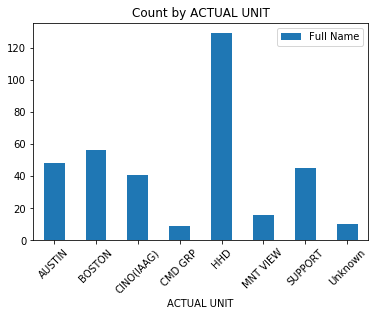

In [51]:
ax = count_unit.plot.bar(x='ACTUAL UNIT',y='Full Name', rot=0)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Count by ACTUAL UNIT')


Text(0.5, 0.98, 'Total Readiness Score Distribution')

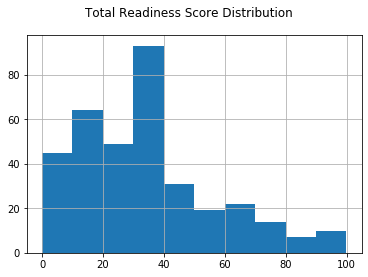

In [64]:
import pylab as pl
metrics_frame['Total Readiness Score'].hist()
pl.suptitle("Total Readiness Score Distribution")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002514C65E948>,
      dtype=object)

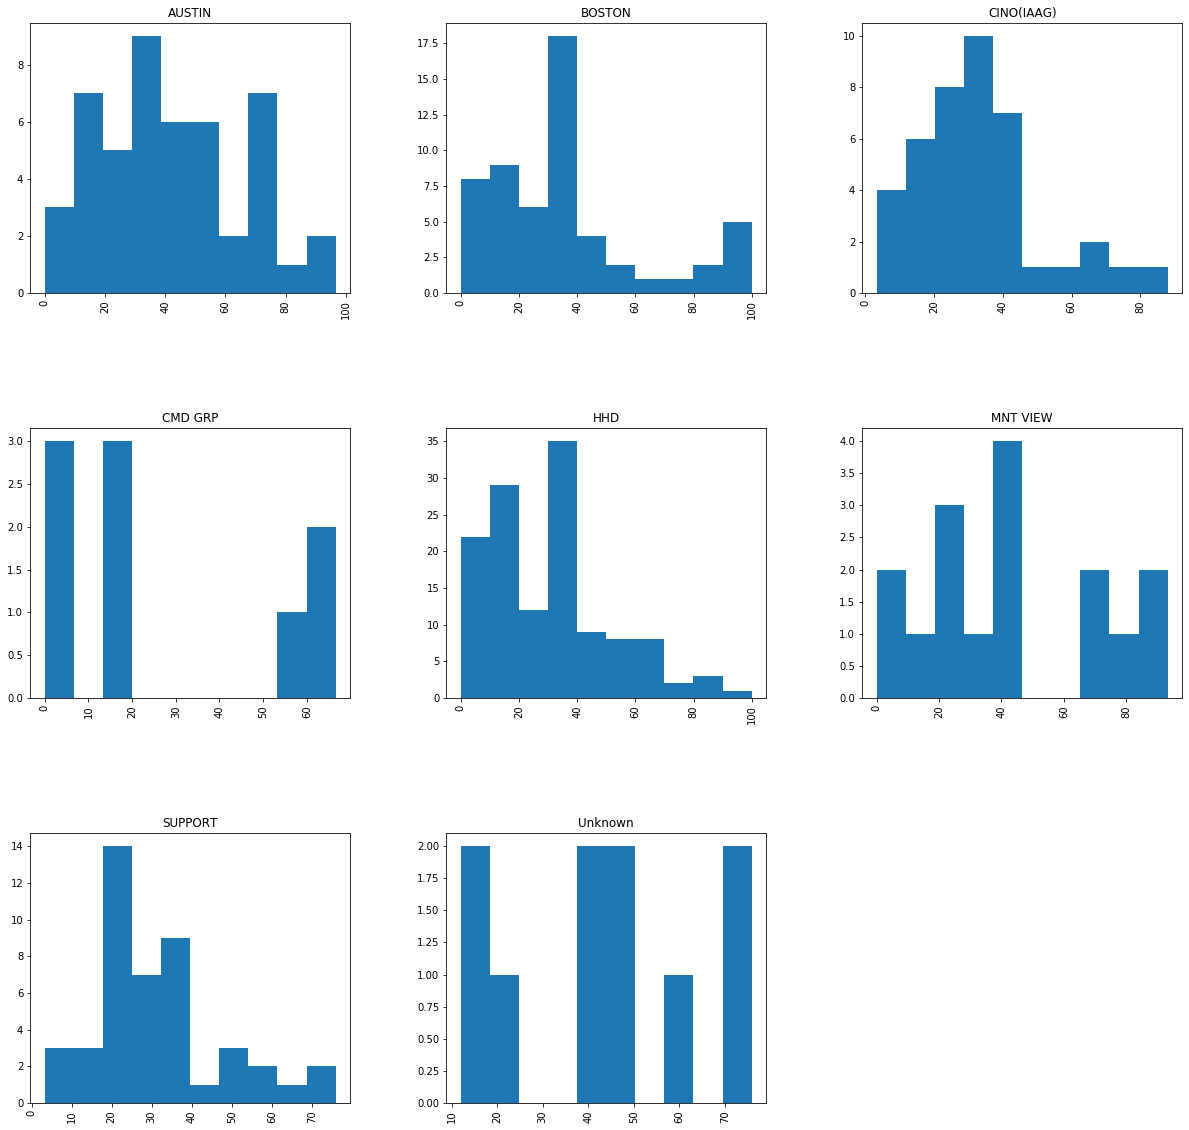

In [65]:
metrics_frame['Total Readiness Score'].hist(by=metrics_frame['ACTUAL UNIT'], 
                                           figsize=(20,20))
#plt.figure(figsize=(20,20))


In [4]:
from scipy import stats
import numpy as np

In [5]:
def create_subsets(groupa, groupb):
    print('comparing %s and %s:' % (groupa, groupb))
    unit_loc_a = groupa
    unit_a_df = metrics_frame.loc[metrics_frame['CITY/SECTION'] == unit_loc_a]
    print('Group %s with average score %s and size %s' % (groupa, 
                                                          unit_a_df['Total Readiness Score'].mean(),
                                                          len(unit_a_df)))
    unit_loc_b = groupb
    unit_b_df = metrics_frame.loc[metrics_frame['CITY/SECTION'] == unit_loc_b]
    print('Group %s with average score %s and size %s' % (groupb, 
                                                          unit_b_df['Total Readiness Score'].mean(),
                                                          len(unit_b_df)))
    return unit_a_df, unit_b_df

In [6]:

def run_t_test(unit_a, unit_b):
    t2, p2 = stats.ttest_ind(unit_a['Total Readiness Score'], unit_b['Total Readiness Score'])
    print('T value: {}'.format(t2))
    print('P value: {}'.format(p2))
    return t2,p2

In [7]:
import itertools as it

In [8]:
t_list = []
p_list = []
group_list = []
group1_vals = []
group2_vals = []
group1_mean = []
group2_mean = []
group1_size = []
group2_size = []
group1_std = []
group2_std = []
combinations = list(it.combinations(metrics_frame['CITY/SECTION'].unique(),2))
for group1, group2 in combinations: 
    group1_df, group2_df = create_subsets(group1, group2)
    t, p = run_t_test(group1_df, group2_df)
    t_list.append(t)
    p_list.append(p)
    group_list.append((group1,group2)),
    group1_vals.append(group1),
    group2_vals.append(group2),
    group1_mean.append(group1_df['Total Readiness Score'].mean()),
    group2_mean.append(group2_df['Total Readiness Score'].mean()),
    group1_size.append(len(group1_df)),
    group2_size.append(len(group2_df)),
    group1_std.append(group1_df['Total Readiness Score'].std()),
    group2_std.append(group2_df['Total Readiness Score'].std())

comparing CMD GRP and CEMA:
Group CMD GRP with average score 23.58 and size 10
Group CEMA with average score 29.82857142857143 and size 7
T value: -0.5204600128271742
P value: 0.6103398736158179
comparing CMD GRP and SJA:
Group CMD GRP with average score 23.58 and size 10
Group SJA with average score 26.233333333333334 and size 9
T value: -0.26499157256825406
P value: 0.7942022760549815
comparing CMD GRP and RETENTION:
Group CMD GRP with average score 23.58 and size 10
Group RETENTION with average score 15.299999999999999 and size 1
T value: nan
P value: nan
comparing CMD GRP and SURG:
Group CMD GRP with average score 23.58 and size 10
Group SURG with average score 7.5 and size 2
T value: 0.8308705580310916
P value: 0.42543987481928713
comparing CMD GRP and TM:
Group CMD GRP with average score 23.58 and size 10
Group TM with average score 33.190909090909095 and size 11
T value: -0.8957724862754587
P value: 0.38158321933605255
comparing CMD GRP and HHD:
Group CMD GRP with average score 

C:\Users\sarah\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\sarah\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


comparing CMD GRP and PHOENIX:
Group CMD GRP with average score 23.58 and size 10
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing CMD GRP and PALO ALTO:
Group CMD GRP with average score 23.58 and size 10
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: -1.8214472790398157
P value: 0.0916216003433997
comparing CMD GRP and BOSTON:
Group CMD GRP with average score 23.58 and size 10
Group BOSTON with average score 42.099999999999994 and size 9
T value: -1.372977993899764
P value: 0.18759995755626613
comparing CMD GRP and NYC:
Group CMD GRP with average score 23.58 and size 10
Group NYC with average score 25.087500000000002 and size 8
T value: -0.15180272235840286
P value: 0.8812401649700461
comparing CMD GRP and DC:
Group CMD GRP with average score 23.58 and size 10
Group DC with average score 39.24 and size 15
T value: -1.5082564658833353
P value: 0.14510360688753723
comparing CMD GRP and ATLANTA:
Group CMD GRP with average sco

Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing CEMA and PALO ALTO:
Group CEMA with average score 29.82857142857143 and size 7
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: -1.4229309453427657
P value: 0.1851951007422774
comparing CEMA and BOSTON:
Group CEMA with average score 29.82857142857143 and size 7
Group BOSTON with average score 42.099999999999994 and size 9
T value: -0.8572949438130708
P value: 0.40571868527427135
comparing CEMA and NYC:
Group CEMA with average score 29.82857142857143 and size 7
Group NYC with average score 25.087500000000002 and size 8
T value: 0.5462702380732276
P value: 0.5941318665170243
comparing CEMA and DC:
Group CEMA with average score 29.82857142857143 and size 7
Group DC with average score 39.24 and size 15
T value: -0.8567040440135866
P value: 0.40175721262580855
comparing CEMA and ATLANTA:
Group CEMA with average score 29.82857142857143 and size 7
Group ATLANTA with average score 27.7

Group AUTONOMY/ROBOTICS with average score 25.65 and size 4
T value: nan
P value: nan
comparing RETENTION and BIG DATA:
Group RETENTION with average score 15.299999999999999 and size 1
Group BIG DATA with average score 9.15 and size 2
T value: nan
P value: nan
comparing RETENTION and ENERGY/MATERIALS:
Group RETENTION with average score 15.299999999999999 and size 1
Group ENERGY/MATERIALS with average score 30.599999999999998 and size 1
T value: nan
P value: nan
comparing RETENTION and MEDICAL/SYNTHETIC BIO:
Group RETENTION with average score 15.299999999999999 and size 1
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
T value: nan
P value: nan
comparing RETENTION and OPERATIONS/PROCESSES:
Group RETENTION with average score 15.299999999999999 and size 1
Group OPERATIONS/PROCESSES with average score 15.0 and size 1
T value: nan
P value: nan
comparing RETENTION and SPACE:
Group RETENTION with average score 15.299999999999999 and size 1
Group SPACE with average

Group SURG with average score 7.5 and size 2
Group DALLAS with average score 59.699999999999996 and size 3
T value: -2.1124775537272904
P value: 0.12507234505115497
comparing SURG and HUNTSVILLE:
Group SURG with average score 7.5 and size 2
Group HUNTSVILLE with average score 60.599999999999994 and size 2
T value: -3.752392495222515
P value: 0.06425144037765439
comparing SURG and DETROIT:
Group SURG with average score 7.5 and size 2
Group DETROIT with average score 24.3 and size 3
T value: -0.8962071473694104
P value: 0.43618278495410295
comparing TM and HHD:
Group TM with average score 33.190909090909095 and size 11
Group HHD with average score 36.06 and size 5
T value: -0.2608144409545684
P value: 0.7980328762229327
comparing TM and G1:
Group TM with average score 33.190909090909095 and size 11
Group G1 with average score 28.892307692307693 and size 13
T value: 0.5174030425363269
P value: 0.6100383857351335
comparing TM and G2:
Group TM with average score 33.190909090909095 and size 

Group HHD with average score 36.06 and size 5
Group ASAALT with average score 33.227999999999994 and size 25
T value: 0.4060223584245619
P value: 0.6878125229196952
comparing HHD and DIU:
Group HHD with average score 36.06 and size 5
Group DIU with average score 39.0 and size 1
T value: nan
P value: nan
comparing HHD and FTAC:
Group HHD with average score 36.06 and size 5
Group FTAC with average score 34.32 and size 15
T value: 0.16289697656332613
P value: 0.8724144239236293
comparing HHD and NEED UPDATE:
Group HHD with average score 36.06 and size 5
Group NEED UPDATE with average score 33.6 and size 1
T value: nan
P value: nan
comparing HHD and CINO(IAAG):
Group HHD with average score 36.06 and size 5
Group CINO(IAAG) with average score 3.3000000000000003 and size 1
T value: nan
P value: nan
comparing HHD and ARTIFICIAL INTELLIGENCE:
Group HHD with average score 36.06 and size 5
Group ARTIFICIAL INTELLIGENCE with average score 30.300000000000004 and size 1
T value: nan
P value: nan
co

Group G1 with average score 28.892307692307693 and size 13
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: -1.9523413133307417
P value: 0.06862244040454504
comparing G1 and BOSTON:
Group G1 with average score 28.892307692307693 and size 13
Group BOSTON with average score 42.099999999999994 and size 9
T value: -1.2310636469328053
P value: 0.23258028690785146
comparing G1 and NYC:
Group G1 with average score 28.892307692307693 and size 13
Group NYC with average score 25.087500000000002 and size 8
T value: 0.5439421890450081
P value: 0.5928075366235928
comparing G1 and DC:
Group G1 with average score 28.892307692307693 and size 13
Group DC with average score 39.24 and size 15
T value: -1.2470111329662463
P value: 0.22351037536707147
comparing G1 and ATLANTA:
Group G1 with average score 28.892307692307693 and size 13
Group ATLANTA with average score 27.700000000000003 and size 6
T value: 0.10312416029027999
P value: 0.9190711818633315
comparing G1 and ORLANDO:
Gro

Group G3/5/7 with average score 30.09310344827586 and size 29
Group BIG DATA with average score 9.15 and size 2
T value: 1.0852396831186841
P value: 0.2867550025470359
comparing G3/5/7 and ENERGY/MATERIALS:
Group G3/5/7 with average score 30.09310344827586 and size 29
Group ENERGY/MATERIALS with average score 30.599999999999998 and size 1
T value: nan
P value: nan
comparing G3/5/7 and MEDICAL/SYNTHETIC BIO:
Group G3/5/7 with average score 30.09310344827586 and size 29
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
T value: -0.7660740818197935
P value: 0.44961828075324684
comparing G3/5/7 and OPERATIONS/PROCESSES:
Group G3/5/7 with average score 30.09310344827586 and size 29
Group OPERATIONS/PROCESSES with average score 15.0 and size 1
T value: nan
P value: nan
comparing G3/5/7 and SPACE:
Group G3/5/7 with average score 30.09310344827586 and size 29
Group SPACE with average score 40.74 and size 5
T value: -0.8565720379798005
P value: 0.3980507245816163
comp

Group CHAP with average score 38.34545454545455 and size 11
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
T value: -0.2575471301332387
P value: 0.8011198467315435
comparing CHAP and OPERATIONS/PROCESSES:
Group CHAP with average score 38.34545454545455 and size 11
Group OPERATIONS/PROCESSES with average score 15.0 and size 1
T value: nan
P value: nan
comparing CHAP and SPACE:
Group CHAP with average score 38.34545454545455 and size 11
Group SPACE with average score 40.74 and size 5
T value: -0.1979244387272543
P value: 0.845949275744879
comparing CHAP and MNT VIEW:
Group CHAP with average score 38.34545454545455 and size 11
Group MNT VIEW with average score 37.949999999999996 and size 2
T value: 0.018507263937409476
P value: 0.9855656121818156
comparing CHAP and LOS ANGELES:
Group CHAP with average score 38.34545454545455 and size 11
Group LOS ANGELES with average score 53.550000000000004 and size 4
T value: -0.9593371042703006
P value: 0.35489242400147325

Group PAO with average score 28.65 and size 2
Group BOSTON with average score 42.099999999999994 and size 9
T value: -0.557719182611561
P value: 0.5906365440129138
comparing PAO and NYC:
Group PAO with average score 28.65 and size 2
Group NYC with average score 25.087500000000002 and size 8
T value: 0.41881574705579133
P value: 0.686369026706797
comparing PAO and DC:
Group PAO with average score 28.65 and size 2
Group DC with average score 39.24 and size 15
T value: -0.5811367674836021
P value: 0.5697781753862234
comparing PAO and ATLANTA:
Group PAO with average score 28.65 and size 2
Group ATLANTA with average score 27.700000000000003 and size 6
T value: 0.037910988398898796
P value: 0.970988551915244
comparing PAO and ORLANDO:
Group PAO with average score 28.65 and size 2
Group ORLANDO with average score 30.3 and size 10
T value: -0.0879026156530201
P value: 0.9316894700178794
comparing PAO and Need Update:
Group PAO with average score 28.65 and size 2
Group Need Update with average 

comparing IG and DENVER:
Group IG with average score 32.5 and size 6
Group DENVER with average score 21.9 and size 1
T value: nan
P value: nan
comparing IG and PHOENIX:
Group IG with average score 32.5 and size 6
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing IG and PALO ALTO:
Group IG with average score 32.5 and size 6
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: -1.247283435864381
P value: 0.24377268781909492
comparing IG and BOSTON:
Group IG with average score 32.5 and size 6
Group BOSTON with average score 42.099999999999994 and size 9
T value: -0.6490176102253337
P value: 0.5276270661060085
comparing IG and NYC:
Group IG with average score 32.5 and size 6
Group NYC with average score 25.087500000000002 and size 8
T value: 0.9323796605246736
P value: 0.3695207965081705
comparing IG and DC:
Group IG with average score 32.5 and size 6
Group DC with average score 39.24 and size 15
T value: -0.5945521805427814
P value: 

T value: -0.9163938850623442
P value: 0.3749763884975543
comparing CCDC and BIG DATA:
Group CCDC with average score 21.05 and size 12
Group BIG DATA with average score 9.15 and size 2
T value: 1.732947816661965
P value: 0.10870005611537842
comparing CCDC and ENERGY/MATERIALS:
Group CCDC with average score 21.05 and size 12
Group ENERGY/MATERIALS with average score 30.599999999999998 and size 1
T value: nan
P value: nan
comparing CCDC and MEDICAL/SYNTHETIC BIO:
Group CCDC with average score 21.05 and size 12
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
T value: -3.093340669022911
P value: 0.008555738191469023
comparing CCDC and OPERATIONS/PROCESSES:
Group CCDC with average score 21.05 and size 12
Group OPERATIONS/PROCESSES with average score 15.0 and size 1
T value: nan
P value: nan
comparing CCDC and SPACE:
Group CCDC with average score 21.05 and size 12
Group SPACE with average score 40.74 and size 5
T value: -3.3330589859500783
P value: 0.0045404098682

comparing FTAC and MEDICAL/SYNTHETIC BIO:
Group FTAC with average score 34.32 and size 15
Group MEDICAL/SYNTHETIC BIO with average score 42.300000000000004 and size 3
T value: -0.5723620712606872
P value: 0.5750316957318184
comparing FTAC and OPERATIONS/PROCESSES:
Group FTAC with average score 34.32 and size 15
Group OPERATIONS/PROCESSES with average score 15.0 and size 1
T value: nan
P value: nan
comparing FTAC and SPACE:
Group FTAC with average score 34.32 and size 15
Group SPACE with average score 40.74 and size 5
T value: -0.5842405522303453
P value: 0.5663094357714751
comparing FTAC and MNT VIEW:
Group FTAC with average score 34.32 and size 15
Group MNT VIEW with average score 37.949999999999996 and size 2
T value: -0.19055468870298758
P value: 0.8514295159373466
comparing FTAC and LOS ANGELES:
Group FTAC with average score 34.32 and size 15
Group LOS ANGELES with average score 53.550000000000004 and size 4
T value: -1.3630359153108556
P value: 0.19065368460013174
comparing FTAC a

Group CINO(IAAG) with average score 3.3000000000000003 and size 1
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing CINO(IAAG) and PALO ALTO:
Group CINO(IAAG) with average score 3.3000000000000003 and size 1
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: nan
P value: nan
comparing CINO(IAAG) and BOSTON:
Group CINO(IAAG) with average score 3.3000000000000003 and size 1
Group BOSTON with average score 42.099999999999994 and size 9
T value: nan
P value: nan
comparing CINO(IAAG) and NYC:
Group CINO(IAAG) with average score 3.3000000000000003 and size 1
Group NYC with average score 25.087500000000002 and size 8
T value: nan
P value: nan
comparing CINO(IAAG) and DC:
Group CINO(IAAG) with average score 3.3000000000000003 and size 1
Group DC with average score 39.24 and size 15
T value: nan
P value: nan
comparing CINO(IAAG) and ATLANTA:
Group CINO(IAAG) with average score 3.3000000000000003 and size 1
Group ATLANTA with average scor

Group BIG DATA with average score 9.15 and size 2
Group DENVER with average score 21.9 and size 1
T value: nan
P value: nan
comparing BIG DATA and PHOENIX:
Group BIG DATA with average score 9.15 and size 2
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing BIG DATA and PALO ALTO:
Group BIG DATA with average score 9.15 and size 2
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: -1.832225221451164
P value: 0.12640531972298275
comparing BIG DATA and BOSTON:
Group BIG DATA with average score 9.15 and size 2
Group BOSTON with average score 42.099999999999994 and size 9
T value: -1.3643028144263587
P value: 0.20561087016927632
comparing BIG DATA and NYC:
Group BIG DATA with average score 9.15 and size 2
Group NYC with average score 25.087500000000002 and size 8
T value: -1.8486671772329315
P value: 0.10168441232193377
comparing BIG DATA and DC:
Group BIG DATA with average score 9.15 and size 2
Group DC with average score 39.24 and si

Group DETROIT with average score 24.3 and size 3
T value: nan
P value: nan
comparing SPACE and MNT VIEW:
Group SPACE with average score 40.74 and size 5
Group MNT VIEW with average score 37.949999999999996 and size 2
T value: 0.12888377591560923
P value: 0.90247350080309
comparing SPACE and LOS ANGELES:
Group SPACE with average score 40.74 and size 5
Group LOS ANGELES with average score 53.550000000000004 and size 4
T value: -0.7593653361461301
P value: 0.47242619216322046
comparing SPACE and SEATTLE:
Group SPACE with average score 40.74 and size 5
Group SEATTLE with average score 28.2 and size 3
T value: 0.905660942013126
P value: 0.4000206983194743
comparing SPACE and DENVER:
Group SPACE with average score 40.74 and size 5
Group DENVER with average score 21.9 and size 1
T value: nan
P value: nan
comparing SPACE and PHOENIX:
Group SPACE with average score 40.74 and size 5
Group PHOENIX with average score 45.0 and size 1
T value: nan
P value: nan
comparing SPACE and PALO ALTO:
Group SP

comparing DENVER and PALO ALTO:
Group DENVER with average score 21.9 and size 1
Group PALO ALTO with average score 50.940000000000005 and size 5
T value: nan
P value: nan
comparing DENVER and BOSTON:
Group DENVER with average score 21.9 and size 1
Group BOSTON with average score 42.099999999999994 and size 9
T value: nan
P value: nan
comparing DENVER and NYC:
Group DENVER with average score 21.9 and size 1
Group NYC with average score 25.087500000000002 and size 8
T value: nan
P value: nan
comparing DENVER and DC:
Group DENVER with average score 21.9 and size 1
Group DC with average score 39.24 and size 15
T value: nan
P value: nan
comparing DENVER and ATLANTA:
Group DENVER with average score 21.9 and size 1
Group ATLANTA with average score 27.700000000000003 and size 6
T value: nan
P value: nan
comparing DENVER and ORLANDO:
Group DENVER with average score 21.9 and size 1
Group ORLANDO with average score 30.3 and size 10
T value: nan
P value: nan
comparing DENVER and Need Update:
Group

T value: -1.5815885172559516
P value: 0.14482507087468444
comparing ORLANDO and DETROIT:
Group ORLANDO with average score 30.3 and size 10
Group DETROIT with average score 24.3 and size 3
T value: 0.3617905313957271
P value: 0.7243624196386997
comparing Need Update and AUSTIN:
Group Need Update with average score 32.67599999999999 and size 25
Group AUSTIN with average score 49.8391304347826 and size 23
T value: -2.65490457560376
P value: 0.010860693320348216
comparing Need Update and DALLAS:
Group Need Update with average score 32.67599999999999 and size 25
Group DALLAS with average score 59.699999999999996 and size 3
T value: -1.7845103534411357
P value: 0.08601571072677017
comparing Need Update and HUNTSVILLE:
Group Need Update with average score 32.67599999999999 and size 25
Group HUNTSVILLE with average score 60.599999999999994 and size 2
T value: -1.5959214103430617
P value: 0.12307141223364
comparing Need Update and DETROIT:
Group Need Update with average score 32.67599999999999 

In [9]:
t_test_frame = pd.DataFrame({'group':group_list,'t_value':t_list,'p_value':p_list,
                            'group1':group1_vals,'group1_size':group1_size,'group1_mean':group1_mean,
                            'group1_std':group1_std,'group2':group2_vals,'group2_size':group2_size,
                             'group2_mean':group2_mean, 'group2_std':group2_std,})

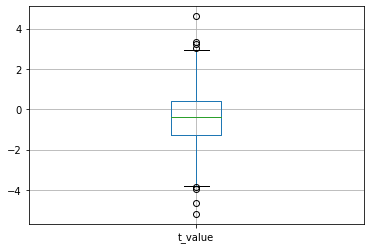

In [10]:
boxlot = t_test_frame.boxplot(column=(['t_value']))

In [11]:
#t_test_frame.to_csv(r'C:\Users\sarah\Documents\python\readiness_score_output\t_test_frame_CITY_SECTION.csv')

In [12]:
t_test_frame

,group,t_value,p_value,group1,group1_size,group1_mean,group1_std,group2,group2_size,group2_mean,group2_std
0,"(CMD GRP, CEMA)",-0.520460,0.610340,CMD GRP,10,23.58000,26.097969,CEMA,7,29.828571,21.497575
1,"(CMD GRP, SJA)",-0.264992,0.794202,CMD GRP,10,23.58000,26.097969,SJA,9,26.233333,15.586372
2,"(CMD GRP, RETENTION)",NaN,NaN,CMD GRP,10,23.58000,26.097969,RETENTION,1,15.300000,NaN
3,"(CMD GRP, SURG)",0.830871,0.425440,CMD GRP,10,23.58000,26.097969,SURG,2,7.500000,10.606602
4,"(CMD GRP, TM)",-0.895772,0.381583,CMD GRP,10,23.58000,26.097969,TM,11,33.190909,23.079838
...,...,...,...,...,...,...,...,...,...,...,...
1076,"(AUSTIN, HUNTSVILLE)",-0.720818,0.478285,AUSTIN,23,49.83913,20.386821,HUNTSVILLE,2,60.600000,16.970563
1077,"(AUSTIN, DETROIT)",2.008678,0.055950,AUSTIN,23,49.83913,20.386821,DETROIT,3,24.300000,24.005624
1078,"(DALLAS, HUNTSVILLE)",-0.035050,0.974242,DALLAS,3,59.70000,32.292878,HUNTSVILLE,2,60.600000,16.970563
1079,"(DALLAS, DETROIT)",1.523797,0.202235,DALLAS,3,59.70000,32.292878,DETROIT,3,24.300000,24.005624


In [37]:
#metrics_frame['CITY/SECTION'].nunique()
metrics_frame['trs'] = metrics_frame['Total Readiness Score']
metrics_frame['city_section'] = metrics_frame['CITY/SECTION']
metrics_frame['actual_unit'] = metrics_frame['ACTUAL UNIT']


### ANOVA Method w Tukey HSD post hoc

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [20]:
mod = ols('trs ~ city_section', data=metrics_frame).fit()

In [26]:
aov_table = sm.stats.anova_lm(mod, type=2)

In [27]:
print(aov_table)

                 df         sum_sq     mean_sq         F    PR(>F)
city_section   46.0   29747.183690  646.677906  1.302885  0.101185
Residual      307.0  152377.288238  496.342958       NaN       NaN


In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [35]:
mc = MultiComparison(metrics_frame['trs'],metrics_frame['city_section'])
tukey_result = mc.tukeyhsd(alpha=0.10)

In [36]:
print(tukey_result)
print('Unique city_section groups: {}'.format(mc.groupsunique))

                  Multiple Comparison of Means - Tukey HSD, FWER=0.10                  
         group1                 group2        meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------------------------
ARTIFICIAL INTELLIGENCE                ASAALT    2.928    0.9  -83.1805  89.0365  False
ARTIFICIAL INTELLIGENCE               ATLANTA     -2.6    0.9  -93.8017  88.6017  False
ARTIFICIAL INTELLIGENCE                AUSTIN  19.5391    0.9  -66.7133 105.7915  False
ARTIFICIAL INTELLIGENCE     AUTONOMY/ROBOTICS    -4.65    0.9  -99.0527  89.7527  False
ARTIFICIAL INTELLIGENCE              BIG DATA   -21.15    0.9  -124.563   82.263  False
ARTIFICIAL INTELLIGENCE                BOSTON     11.8    0.9  -77.2037 100.8037  False
ARTIFICIAL INTELLIGENCE                  CCDC    -9.25    0.9  -97.1341  78.6341  False
ARTIFICIAL INTELLIGENCE                  CEMA  -0.4714    0.9  -90.7377  89.7948  False
ARTIFICIAL INTELLIGENCE         

In [48]:
mod = ols('trs ~ actual_unit', data=metrics_frame).fit()
aov_table = sm.stats.anova_lm(mod, type=2)
print(aov_table)
mc = MultiComparison(metrics_frame['trs'],metrics_frame['actual_unit'])
tukey_result = mc.tukeyhsd(alpha=0.10)

                df         sum_sq      mean_sq         F    PR(>F)
actual_unit    7.0    8703.496724  1243.356675  2.480677  0.016984
Residual     346.0  173420.975204   501.216691       NaN       NaN


In [49]:
print(tukey_result)
print('Unique actual_unit groups: {}'.format(mc.groupsunique))

     Multiple Comparison of Means - Tukey HSD, FWER=0.10     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
    AUSTIN     BOSTON  -5.8554 0.8831 -18.1554  6.4446  False
    AUSTIN CINO(IAAG)  -8.9991 0.5503 -22.2971  4.2989  False
    AUSTIN    CMD GRP -15.1625 0.5655 -37.8768  7.5518  False
    AUSTIN        HHD -11.6788 0.0451 -22.2512 -1.1064   True
    AUSTIN   MNT VIEW   2.1563    0.9 -15.8952 20.2077  False
    AUSTIN    SUPPORT -10.4958 0.3193 -23.4711  2.4795  False
    AUSTIN    Unknown   3.0225    0.9 -18.7143 24.7593  False
    BOSTON CINO(IAAG)  -3.1437    0.9 -15.9967  9.7092  False
    BOSTON    CMD GRP  -9.3071    0.9 -31.7638 13.1495  False
    BOSTON        HHD  -5.8234 0.7075 -15.8303  4.1835  False
    BOSTON   MNT VIEW   8.0116    0.9  -9.7146 25.7378  False
    BOSTON    SUPPORT  -4.6405    0.9 -17.1593  7.8783  False
    BOSTON    Unknown   8.8779    0.9 -12.5896 30.3453  False
CINO(IAA

### ANOVA method with Dunnett's Method post hoc